In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import datetime as dt
import torch
import numpy as np
from collections import Counter

In [2]:
from transformers import pipeline
sentiment_analysis = pipeline("sentiment-analysis")
sentiment_toxicity = pipeline("sentiment-analysis", model="unitary/toxic-bert")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)
C:\Users\ray\anaconda3\envs\Pytorch\lib\site-packages\torch\nn\modules\module.py:1402: UserWarning: positional arguments and argument "destination" are deprecated. nn.Module.state_dict will not accept them in the future. Refer to https://pytorch.org/docs/master/generated/torch.nn.Module.html#torch.nn.Module.state_dict for details.
  warnings.warn(


In [3]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"

In [3]:
def data_processing(sub, field = "submission"):
    file_name = "data/" + field + "_" + sub + ".csv"
    df = pd.read_csv(file_name,index_col=0)
    print("subreddit : " + sub)
    print(df.describe())
    print(df.info())
    return df

In [4]:
def have_bidirectional_relationship(G, node1, node2):
    return G.has_edge(node1, node2) and G.has_edge(node2, node1)

In [5]:
subreddit_list = ["politics", "worldnews", "conservative",
                  "conspiracy", "NeutralPolitics"]

In [6]:
database = {}

In [27]:
num_counts = 0
for sub in subreddit_list:
    df = data_processing(sub, field = "comment")
    num_counts += df.shape[0]

subreddit : politics
              score
count  1.107311e+06
mean   5.079730e+01
std    4.078029e+02
min   -3.490000e+02
25%    1.000000e+00
50%    3.000000e+00
75%    1.000000e+01
max    3.436400e+04
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1107311 entries, 0 to 1161
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   id             1107311 non-null  object
 1   author         1044711 non-null  object
 2   body           1107305 non-null  object
 3   parent_id      1107311 non-null  object
 4   score          1107311 non-null  int64 
 5   subreddit      1107311 non-null  object
 6   subreddit_id   1107311 non-null  object
 7   submission_id  1107311 non-null  object
dtypes: int64(1), object(7)
memory usage: 76.0+ MB
None
subreddit : worldnews
              score
count  1.053075e+06
mean   7.519680e+01
std    6.082721e+02
min   -5.440000e+02
25%    1.000000e+00
50%    3.000000e+00
75%    1.400000e+01
ma

In [183]:
pol_df = data_processing("politics", field = "comment")

subreddit : politics
              score
count  1.107311e+06
mean   5.079730e+01
std    4.078029e+02
min   -3.490000e+02
25%    1.000000e+00
50%    3.000000e+00
75%    1.000000e+01
max    3.436400e+04
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1107311 entries, 0 to 1161
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   id             1107311 non-null  object
 1   author         1044711 non-null  object
 2   body           1107305 non-null  object
 3   parent_id      1107311 non-null  object
 4   score          1107311 non-null  int64 
 5   subreddit      1107311 non-null  object
 6   subreddit_id   1107311 non-null  object
 7   submission_id  1107311 non-null  object
dtypes: int64(1), object(7)
memory usage: 76.0+ MB
None


In [442]:
pol_df[:10]

,id,author,body,parent_id,score,subreddit,subreddit_id,submission_id
0,hynym3j,AutoModerator,"\nAs a reminder, this subreddit [is for civil ...",t3_t2suj2,1,politics,t5_2cneq,t2suj2
1,hyotmts,Lunar_Deer,Americans who support Putin can get fucked.,t3_t2suj2,7055,politics,t5_2cneq,t2suj2
2,hyo3bc6,workerbee77,Bob Mueller laid out the charges that Donald T...,t3_t2suj2,3709,politics,t5_2cneq,t2suj2
3,hyo265c,bobface222,He is almost correct,t3_t2suj2,15571,politics,t5_2cneq,t2suj2
4,hyoiog1,Jacob_C,I don't think people here understand the word ...,t3_t2suj2,1582,politics,t5_2cneq,t2suj2
5,hyo0agn,Bess_Marvin_Curls,Take out “almost”. And trump is #1 in treason.,t3_t2suj2,3454,politics,t5_2cneq,t2suj2
6,hyo0m2p,notyomamasusername,I hope this is the crucible that finally clean...,t3_t2suj2,696,politics,t5_2cneq,t2suj2
7,hyoofxx,-Economist-,"The good news, my dad is switching to voting b...",t3_t2suj2,220,politics,t5_2cneq,t2suj2
8,hyo1m3j,nodustspeck,"Your votes need to reflect what you say, Romne...",t3_t2suj2,770,politics,t5_2cneq,t2suj2
9,hyp8991,Zezin96,I’m beginning to regret dragging this guy thro...,t3_t2suj2,44,politics,t5_2cneq,t2suj2


In [142]:
df_pol_bottom = df_pol.sort_values(ascending=True, by=['score']).reset_index(drop=True)

In [143]:
df_pol_bottom = df_pol_bottom.iloc[:1000]

In [144]:
df_pol_bottom

,id,author,body,parent_id,score,subreddit,subreddit_id,submission_id
0,hiw6soi,NaN,[removed],t1_hivp5qw,-349,politics,t5_2cneq,qkcq4y
1,idvjjc2,nautilicious,Torah prohibits same sex relations as well as ...,t1_idve8u9,-289,politics,t5_2cneq,vlinm9
2,inqw1uh,Hue_mungous,"That's funny, cause he speaks well. I'm not su...",t1_inqv5qb,-259,politics,t5_2cneq,xa04le
3,inapz9r,NaN,[removed],t3_x77612,-240,politics,t5_2cneq,x77612
4,hiw90hl,NaN,no they've not been right leaning. They've bee...,t1_hiw8ff7,-239,politics,t5_2cneq,qkcq4y
...,...,...,...,...,...,...,...,...
995,iawc6im,NaN,[removed],t3_v35mg2,-50,politics,t5_2cneq,v35mg2
996,hu88mpi,idontknowwhythisugh,The same way democrats got mad at Trump for fu...,t3_scp1nr,-50,politics,t5_2cneq,scp1nr
997,igyby56,Coy0te_Bongwater,Sure he did,t3_w3nchd,-50,politics,t5_2cneq,w3nchd
998,ibwga9g,No_Zookeepergame_27,How many watched the new inflation reading and...,t3_v9h2j7,-50,politics,t5_2cneq,v9h2j7


In [145]:
df_pol_bottom = df_pol_bottom[~df_pol_bottom.body.str.contains("removed|deleted")].reset_index(drop=True)

In [125]:
df_pol_bottom_text = df_pol_bottom["body"].to_list()

In [126]:
toxicity = []
for comment in df_pol_bottom_text:
    results = sentiment_toxicity(comment)
    toxicity.append(results[0])

In [146]:
df_toxicity = pd.DataFrame(toxicity)

In [147]:
df_toxicity.rename(columns = {'score':'toxicity_score'}, inplace = True)

In [148]:
df_pol_bottom = df_pol_bottom.join(df_toxicity)

In [149]:
df_pol_bottom.describe()

,score,toxicity_score
count,760.000000,760.000000
mean,-69.951316,0.160151
std,24.622665,0.296156
min,-289.000000,0.000553
25%,-75.000000,0.001203
50%,-63.000000,0.009040
75%,-55.000000,0.137479
max,-50.000000,0.998709


In [182]:
df_pol_bottom.sort_values(ascending=False, by = ['toxicity_score']).reset_index(drop=True)

,id,author,body,parent_id,score,subreddit,subreddit_id,submission_id,label,toxicity_score
0,irf6y7p,erevos33,Why the fuck is socialism wrong?!\n\nDonthey e...,t3_xxx3r7,-72,politics,t5_2cneq,xxx3r7,toxic,0.998709
1,iobhlfd,dawgtown22,Young people are fucking dumb lol,t3_xdicpa,-55,politics,t5_2cneq,xdicpa,toxic,0.998462
2,hw4zh7c,Chopperblane,Imagine being scared of a dude in a fucking bu...,t3_sntmw2,-74,politics,t5_2cneq,sntmw2,toxic,0.998447
3,hvk4939,Tony2189,Lmfao anyone listening to Noam fucking Chomsky...,t3_sk8ffr,-71,politics,t5_2cneq,sk8ffr,toxic,0.997456
4,inaq3pr,Jaded_Prompt_15,Thats still the stupidest fucking nickname ever,t3_x77612,-111,politics,t5_2cneq,x77612,toxic,0.996905
...,...,...,...,...,...,...,...,...,...,...
755,ipbr7lt,BullshitterAlert,Please feel free to visit the Martha's Vineyar...,t3_xk1gbc,-61,politics,t5_2cneq,xk1gbc,toxic,0.000567
756,ilha96d,dnsnsians,I thought you said Hilary Clinton for a second.,t3_wvrqbu,-62,politics,t5_2cneq,wvrqbu,toxic,0.000567
757,iishlbz,vahky,Yeah. This is why the court unrecognized it as...,t3_wf4ews,-63,politics,t5_2cneq,wf4ews,toxic,0.000565
758,ibz1js8,Longjumping_Vast_797,Can we please focus on inflation? Thanks.,t3_v9vhrp,-99,politics,t5_2cneq,v9vhrp,toxic,0.000559


In [172]:
df_pol_top = df_pol.sort_values(ascending=False, by=['score']).reset_index(drop=True)

In [173]:
df_pol_top = df_pol_top.iloc[:1000]

In [441]:
df_pol_top[:10]

,id,author,body,parent_id,score,subreddit,subreddit_id,submission_id,label,toxicity_score
0,idlais1,ExRays,People are angry. They want Democrats to be an...,t3_vjuvlk,34364,politics,t5_2cneq,vjuvlk,toxic,0.200728
1,iojpten,soleilmoonfly,Call his fuckin' bluff. I'm tired of this; we ...,t3_xf0os6,30749,politics,t5_2cneq,xf0os6,toxic,0.993720
2,if2wav8,thinkswithportals,"Then arrest him, just like we commoners would ...",t3_vsrkzz,29066,politics,t5_2cneq,vsrkzz,toxic,0.021923
3,hid9ylh,rewlor,Senator with over 100 days of annual paid leav...,t3_qhkr8f,24834,politics,t5_2cneq,qhkr8f,toxic,0.001273
4,id1p6ns,gunnesaurus,A measure to repeal the 1965 voting rights act...,t3_vgivix,23655,politics,t5_2cneq,vgivix,toxic,0.000561
5,i999vz6,atxlrj,This is exactly the trajectory I wanted for Ma...,t3_utei9f,23563,politics,t5_2cneq,utei9f,toxic,0.000634
6,ilo2ogy,Southern_Vanguard,I own a business. Therefore I am friends on S...,t3_wwxuvy,22752,politics,t5_2cneq,wwxuvy,toxic,0.073685
7,ijikdiy,pimpampoumz,What’s most striking to me is how the FBI raid...,t3_wjoj1w,21578,politics,t5_2cneq,wjoj1w,toxic,0.000656
8,i877lph,2_Spicy_2_Impeach,Least shocking thing I’ve read today.,t3_undbmc,21347,politics,t5_2cneq,undbmc,toxic,0.000622
9,io40f3p,meatsmoothie82,Q- “he’s being sworn back in as president by K...,t3_xc8c38,21324,politics,t5_2cneq,xc8c38,toxic,0.000863


In [175]:
df_pol_top = df_pol_top[~df_pol_top.body.str.contains("removed|deleted")].reset_index(drop=True)

In [176]:
df_pol_top_text = df_pol_top["body"].to_list()

In [153]:
toxicity = []
for comment in df_pol_top_text:
    results = sentiment_toxicity(comment, truncation=True)
    toxicity.append(results[0])

In [177]:
df_toxicity = pd.DataFrame(toxicity)

In [178]:
df_toxicity.rename(columns = {'score':'toxicity_score'}, inplace = True)

In [179]:
df_pol_top = df_pol_top.join(df_toxicity)

In [180]:
df_pol_top.describe()

,score,toxicity_score
count,967.000000,967.000000
mean,10062.334023,0.184111
std,3442.839379,0.329940
min,6567.000000,0.000526
25%,7554.500000,0.000918
50%,8929.000000,0.004940
75%,11561.500000,0.145822
max,34364.000000,0.998468


In [181]:
df_pol_top.sort_values(ascending=False, by = ['toxicity_score']).reset_index(drop=True)

,id,author,body,parent_id,score,subreddit,subreddit_id,submission_id,label,toxicity_score
0,imzyi8v,LockheedMartinLuther,"MAGA republicans: ""Fuck Joe Biden!"" \n\nJoe B...",t3_x59p0m,11011,politics,t5_2cneq,x59p0m,toxic,0.998468
1,ijbhigd,tazebot,T1 diabetic here. Fuck you GOP. Fuck you and...,t3_wihq4u,9258,politics,t5_2cneq,wihq4u,toxic,0.997967
2,ir6dh59,bakedmon,Get fucked Cannon.,t3_xwgido,12843,politics,t5_2cneq,xwgido,toxic,0.997483
3,hz02kph,NobodyRules,Everything is fun and games until the whole wo...,t3_t4q4nz,7294,politics,t5_2cneq,t4q4nz,toxic,0.997282
4,iecbxjz,Zxar,Get this fucker off the bench. This is ridiculous,t3_vodnck,12812,politics,t5_2cneq,vodnck,toxic,0.997271
...,...,...,...,...,...,...,...,...,...,...
962,ihhpcs8,WyldeStile,The more we hear about the Secret Service acti...,t3_w74w19,12925,politics,t5_2cneq,w74w19,toxic,0.000557
963,ijin9bz,saintpauli,"""The discovery of classified information at Ma...",t3_wjoj1w,10678,politics,t5_2cneq,wjoj1w,toxic,0.000550
964,hvyad9i,theman1119,It's was nice of him to confirm that on televi...,t1_hvy0lpu,8121,politics,t5_2cneq,smpjpo,toxic,0.000545
965,iqb3gii,riotacting,He genuinely thinks giving praise to biden wil...,t1_iqaxtox,9691,politics,t5_2cneq,xqrz9e,toxic,0.000543


In [184]:
pol_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1107311 entries, 0 to 1161
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   id             1107311 non-null  object
 1   author         1044711 non-null  object
 2   body           1107305 non-null  object
 3   parent_id      1107311 non-null  object
 4   score          1107311 non-null  int64 
 5   subreddit      1107311 non-null  object
 6   subreddit_id   1107311 non-null  object
 7   submission_id  1107311 non-null  object
dtypes: int64(1), object(7)
memory usage: 76.0+ MB


In [254]:
pol_df = pol_df.dropna(subset=['author'])

In [273]:
pol_df_author = dict(zip(pol_df.id, pol_df.author))

In [187]:
pol_df_submission = data_processing("politics")

subreddit : politics
       num_comments          score  upvote_ratio
count   1000.000000    1000.000000   1000.000000
mean    3337.468000   47601.278000      0.876280
std     2520.555051   15288.451553      0.054481
min      511.000000   28907.000000      0.650000
25%     1923.750000   36119.250000      0.850000
50%     2799.500000   43840.000000      0.890000
75%     4149.000000   55130.250000      0.912500
max    39789.000000  119406.000000      0.970000
<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, t2suj2 to wk0sxh
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   author        960 non-null    object 
 1   title         1000 non-null   object 
 2   selftext      9 non-null      object 
 3   num_comments  1000 non-null   int64  
 4   score         1000 non-null   int64  
 5   upvote_ratio  1000 non-null   float64
 6   url           1000 non-null   object 
dtypes: float64(1), int64(2), object(4)
mem

In [271]:
pol_df_submission.dropna(subset=['author'], inplace = True)

In [272]:
pol_df_submission.reset_index(inplace=True)

In [274]:
pol_df_author.update(zip(pol_df_submission.id, pol_df_submission.author))

In [7]:
pol_top_level_comment_df = pol_df[pol_df['parent_id'].str.contains("t3_")]

NameError: name 'pol_df' is not defined

In [276]:
pol_not_top_level_comment_df = pol_df[pol_df['parent_id'].str.contains("t1_")]

In [277]:
pol_not_top_level_comment_df = pol_not_top_level_comment_df.dropna()

In [278]:
pol_top_level_comment_df = pol_top_level_comment_df.dropna()

In [279]:
pol_top_level_comment_df

,id,author,body,parent_id,score,subreddit,subreddit_id,submission_id
0,hynym3j,AutoModerator,"\nAs a reminder, this subreddit [is for civil ...",t3_t2suj2,1,politics,t5_2cneq,t2suj2
1,hyotmts,Lunar_Deer,Americans who support Putin can get fucked.,t3_t2suj2,7055,politics,t5_2cneq,t2suj2
2,hyo3bc6,workerbee77,Bob Mueller laid out the charges that Donald T...,t3_t2suj2,3709,politics,t5_2cneq,t2suj2
3,hyo265c,bobface222,He is almost correct,t3_t2suj2,15571,politics,t5_2cneq,t2suj2
4,hyoiog1,Jacob_C,I don't think people here understand the word ...,t3_t2suj2,1582,politics,t5_2cneq,t2suj2
...,...,...,...,...,...,...,...,...
472,ijljhse,Hungry-Word-168,It’s only because we dislike Authoritarian gov...,t3_wk0sxh,-13,politics,t5_2cneq,wk0sxh
473,ijmctvw,conspiracythreads,Going after Trump in this fashion is obviously...,t3_wk0sxh,-13,politics,t5_2cneq,wk0sxh
474,ijmom7e,Repulsive_Courage467,Clintons and Trump's are both guilty. We were...,t3_wk0sxh,-11,politics,t5_2cneq,wk0sxh
475,ijlkyc4,ieatcomunist,"Hillary emails, Hunters laptop, and Trumps Ru...",t3_wk0sxh,-11,politics,t5_2cneq,wk0sxh


In [280]:
pol_not_top_level_comment_df

,id,author,body,parent_id,score,subreddit,subreddit_id,submission_id
726,hyp1lf3,oojamaflip123,How do they even exist in the first place. Wha...,t1_hyotmts,1640,politics,t5_2cneq,t2suj2
727,hypeqww,Cambronian717,There was a substitute at my local middle scho...,t1_hyotmts,81,politics,t5_2cneq,t2suj2
729,hyo7tvk,Phrii,"I mean, he laid out the case for collusion whe...",t1_hyo3bc6,791,politics,t5_2cneq,t2suj2
730,hyp0azm,ModerateExtremism,Some of the current profiteers share a lot of ...,t1_hyo3bc6,35,politics,t5_2cneq,t2suj2
731,hyov3q9,madcaesar,Fuck Mueller and his weak spined report. We ne...,t1_hyo3bc6,60,politics,t5_2cneq,t2suj2
...,...,...,...,...,...,...,...,...
1157,ijlfys8,TheCoelacanth,It was a criminal act for him to destroy recor...,t1_ijlbxeg,20,politics,t5_2cneq,wk0sxh
1158,ijlu0sa,evil_newton,"That’s all very well, but irrelevant if he did...",t1_ijlhc7a,9,politics,t5_2cneq,wk0sxh
1159,ijlu5jf,juliet_in_yoga_pants,"Good point, llamaface.",t1_ijlu1nz,9,politics,t5_2cneq,wk0sxh
1160,ijlcy7s,Johnny_Appleweed,They’ve apparently been dating for 5 years. Th...,t1_ijlbqkz,47,politics,t5_2cneq,wk0sxh


In [301]:
relation = []

In [302]:
for index, row in pol_top_level_comment_df.iterrows():
    try:
        parent_author = pol_df_author[row["parent_id"][3:]]
        relation.append((row["author"], parent_author))
    except:
        pass

In [303]:
for index, row in pol_not_top_level_comment_df.iterrows():
    try:
        parent_author = pol_df_author[row["parent_id"][3:]]
        relation.append((row["author"], parent_author))
    except:
        pass

In [8]:
counter = Counter(relation)
counter = Counter({k: c for k, c in counter.items() if c >= 2})
common_relation = sorted(counter, key=counter.get, reverse=True)

NameError: name 'relation' is not defined

In [420]:
G_01 = nx.DiGraph()
G_01.add_nodes_from(pol_df_author.values())
G_01.add_edges_from(common_relation)

In [421]:
G_01.remove_nodes_from(list(nx.isolates(G_01)))

In [422]:
biconnections = []
if u > v:
    v, u = u, v
for u, v in G_01.edges():
    if have_bidirectional_relationship(G_01, u, v):
        if u != v:
            biconnections.append((u,v))

In [423]:
biconnections

[('sesbry', 'ReddicaPolitician'),
 ('gmb92', 'danarexasaurus'),
 ('hwgl', 'Frustrable_Zero'),
 ('8to24', 'JohnDivney'),
 ('8to24', 'BewBewsBoutique'),
 ('8to24', 'gscjj'),
 ('8to24', 'HaElfParagon'),
 ('8to24', 'Bullmoosefuture'),
 ('Apart_Number_2792', 'SoylentBurger'),
 ('paradoxologist', 'Zoophagous'),
 ('Special_FX_B', 'Jasquirtin'),
 ('NUMBerONEisFIRST', 'Doderdog21'),
 ('rustyseapants', 'waterbuffalo750'),
 ('Outside-Eagle9535', 'karl_jonez'),
 ('Budmanes', 'k1ngCornbread'),
 ('no-one-but-crow', 'taggedandgagged'),
 ('beebeereebozo', 'AlaskanPotatoSlap'),
 ('grigsbie', 'Remix2Cognition'),
 ('BlueClass', 'chodepoker'),
 ('BlueClass', 'KingofLingerie'),
 ('laffnlemming', 'IamnotKevinFeige'),
 ('machineprophet343', 'ItsjustJim621'),
 ('11thstalley', 'Fallingknives911'),
 ('riotacting', 'tundey_1'),
 ('wish1977', 'Datboisweez'),
 ('BobbyCostner', 'WidespreadPaneth'),
 ('DernderMerfflin', 'Moraulf232'),
 ('PartialToDairyThings', 'rogozh1n'),
 ('ProDiesel', 'LuxHelianthus'),
 ('coosaca

In [424]:
G_02 = nx.DiGraph()
G_02.add_nodes_from(pol_df_author.values())
G_02.add_edges_from(biconnections)

In [425]:
G_02.remove_nodes_from(list(nx.isolates(G_02)))

In [426]:
G_02.number_of_nodes()

5590

In [427]:
for component in list(nx.weakly_connected_components(G_02)):
    if len(component)<20:
        for node in component:
            G_02.remove_node(node)

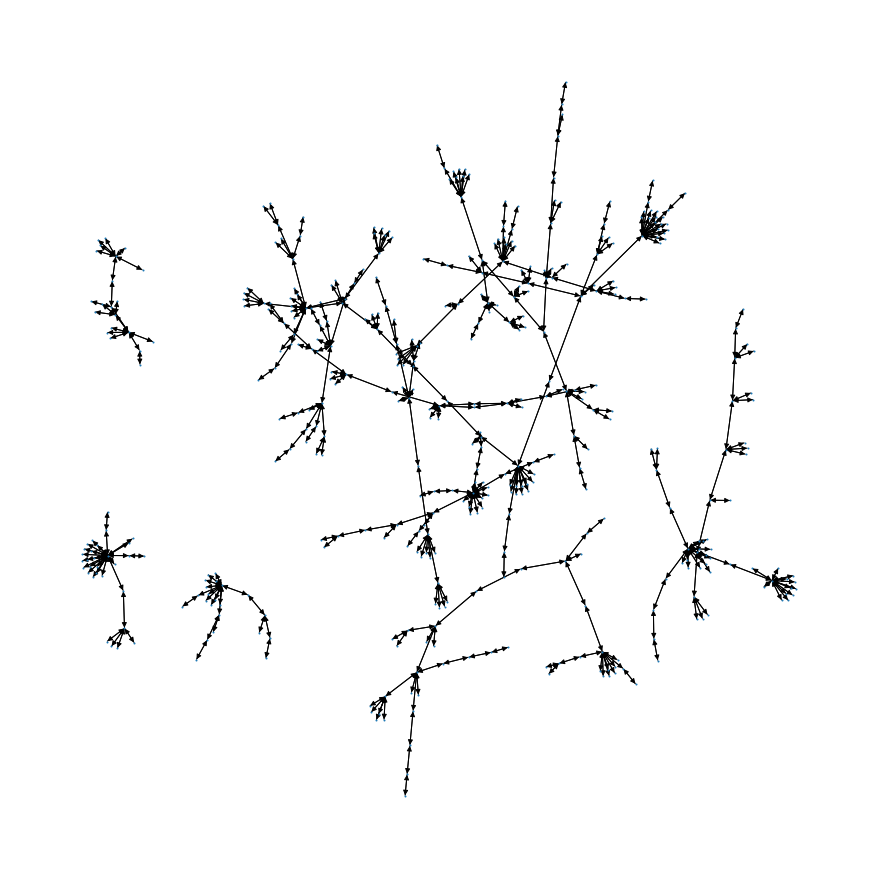

In [440]:
pos = nx.spring_layout(G_02)

plt.figure(1, figsize=(12,12)) 
nx.draw(G_02,pos, node_size = 1)
plt.show()